#Big Mart Sales Prediction:

Importing the dependencies:

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

##Data Collection and Preprocessing:

In [151]:
#loading the csv file into pandas DataFrame

big_mart_df = pd.read_csv('/content/drive/MyDrive/Datasets/Big Mart Train.csv')

In [152]:
#printing the first five rows of the dataframe
big_mart_df.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [153]:
#getting the number of rows and columns
big_mart_df.shape


(8523, 12)

In [154]:
#getting some more info about our data
big_mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type 
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type 
- Outlet_Type 

In [155]:
#checking for the missing values in our data

big_mart_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see that there are some missing values in our data so we have to handle those values using either imputation or dropping the values from the data if the data is quite big. Here we will use imputation that is using the mean and mode.

Mean -->Average Value

Mode --> Most Frequent Value

In [156]:
#mean value of  "Item_weight" column

big_mart_df['Item_Weight'].mean()

12.857645184136183

In [157]:
#filling the missing values in "Item_weight" column using the mean of that column.

big_mart_df['Item_Weight'].fillna(big_mart_df['Item_Weight'].mean(), inplace= True)

In [158]:
#checking for the missing values in our data

big_mart_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [159]:
#replacing the missing values in "Outlet_Size" with mode
mode_of_outlet_size = big_mart_df.pivot_table(values= 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [160]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [161]:
missing_values = big_mart_df['Outlet_Size'].isnull()

In [162]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [163]:
big_mart_df.loc[missing_values, 'Outlet_Size'] = big_mart_df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [164]:
#checking for the missing values in our data

big_mart_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###Data Analysis:

In [165]:
#getting the statistical measures about the data
big_mart_df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features:

In [166]:
sns.set()

<Figure size 432x432 with 0 Axes>

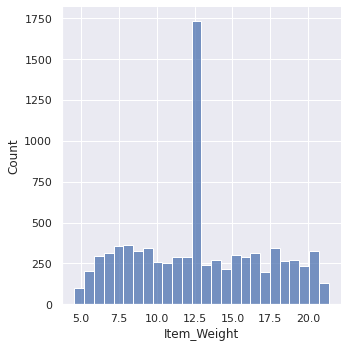

In [167]:
# Item_Weight distribution

plt.figure(figsize= (6,6))
sns.displot(big_mart_df['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

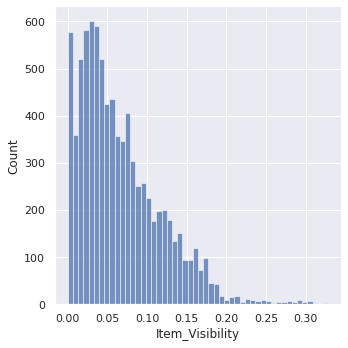

In [168]:
# Item_Visibility distribution

plt.figure(figsize= (6,6))
sns.displot(big_mart_df['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

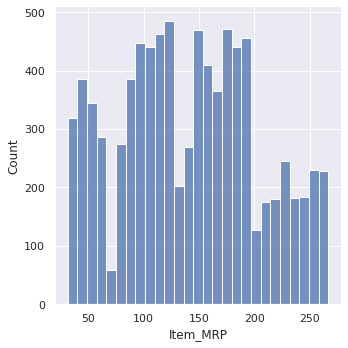

In [169]:
# Item_MRP distribution

plt.figure(figsize= (6,6))
sns.displot(big_mart_df['Item_MRP'])
plt.show()

<Figure size 432x432 with 0 Axes>

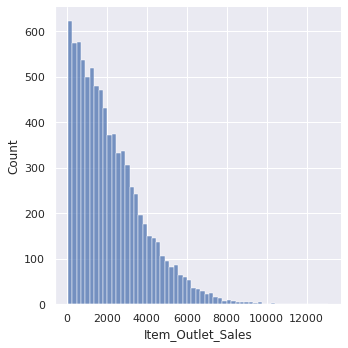

In [170]:
# Item_Outlet_Sales distribution

plt.figure(figsize= (6,6))
sns.displot(big_mart_df['Item_Outlet_Sales'])
plt.show()

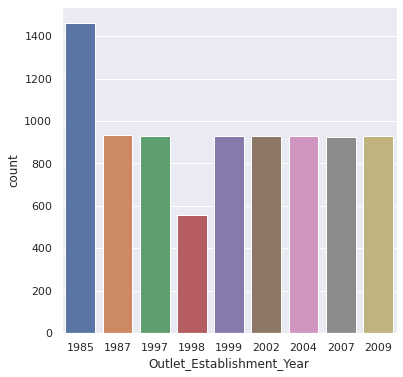

In [171]:
# Outlet_Establishment_Year column

plt.figure(figsize=(6,6))
sns.countplot(x= 'Outlet_Establishment_Year', data=big_mart_df)
plt.show()

Categorical Features:

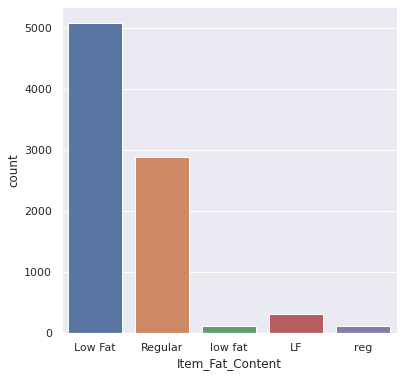

In [172]:
# Item_Fat_Content column

plt.figure(figsize=(6,6))
sns.countplot(x= 'Item_Fat_Content', data=big_mart_df)
plt.show()

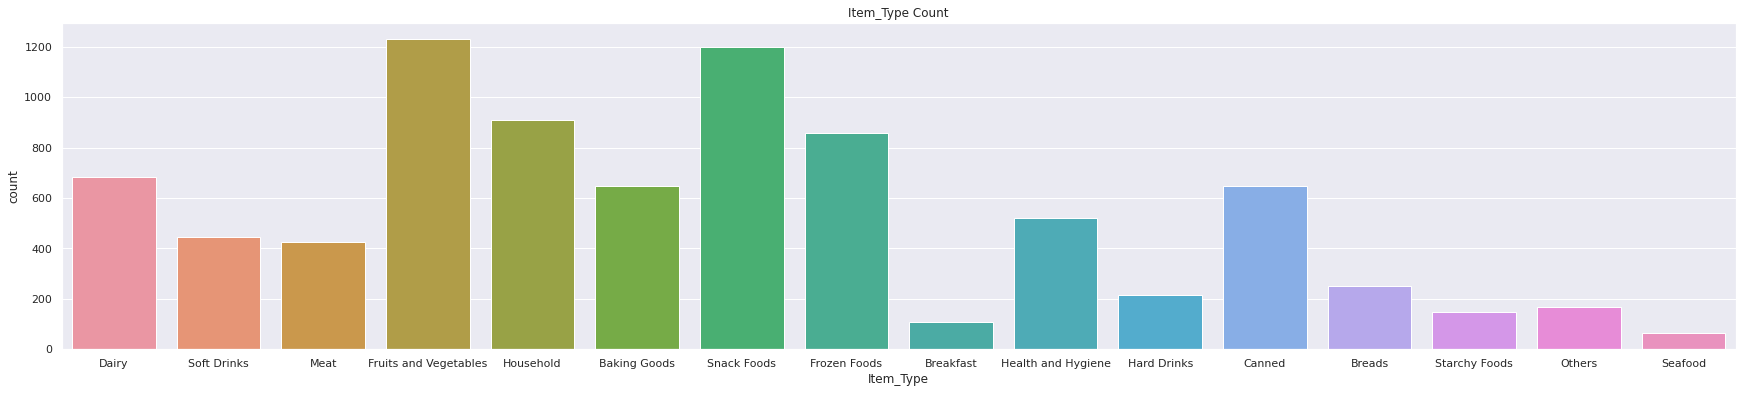

In [173]:
# Item_Type column

plt.figure(figsize=(30,6))
sns.countplot(x= 'Item_Type', data=big_mart_df)
plt.title('Item_Type Count')
plt.show()

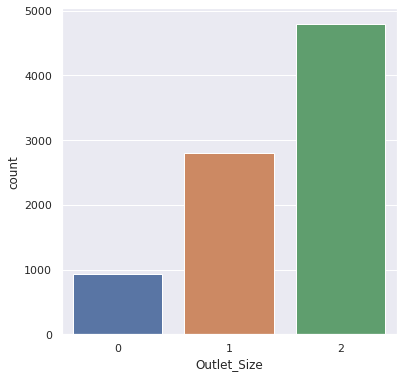

In [181]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_df)
plt.show()

In [174]:
big_mart_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [175]:
big_mart_df.replace({'Item_Fat_Content': {'low fat':'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)

In [176]:
big_mart_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding:

In [178]:
encoder = LabelEncoder()

In [179]:
big_mart_df['Item_Identifier'] = encoder.fit_transform(big_mart_df['Item_Identifier'])

big_mart_df['Item_Fat_Content'] = encoder.fit_transform(big_mart_df['Item_Fat_Content'])

big_mart_df['Item_Type'] = encoder.fit_transform(big_mart_df['Item_Type'])

big_mart_df['Outlet_Identifier'] = encoder.fit_transform(big_mart_df['Outlet_Identifier'])

big_mart_df['Outlet_Size'] = encoder.fit_transform(big_mart_df['Outlet_Size'])

big_mart_df['Outlet_Location_Type'] = encoder.fit_transform(big_mart_df['Outlet_Location_Type'])

big_mart_df['Outlet_Type'] = encoder.fit_transform(big_mart_df['Outlet_Type'])

In [180]:
big_mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Features and Targets:

In [182]:
X = big_mart_df.drop(columns= 'Item_Outlet_Sales')
Y = big_mart_df['Item_Outlet_Sales']

In [183]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]


In [184]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the Data into Training data and the test data:

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [186]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [187]:
regressor = XGBRegressor()

In [188]:
regressor.fit(X_train, Y_train)

[20:07:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation:


In [189]:
#training data prediction

training_data_prediction = regressor.predict(X_train)

In [190]:
# R squared value:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [191]:
print(r2_train)

0.6356747146840602


In [192]:
#testing data prediction

test_data_prediction = regressor.predict(X_test)

In [193]:
# R squared value:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [194]:
print(r2_test)

0.5844466567620883
